In [1]:
import numpy as np
import networkx as nx
import cirq
import sys, os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
libpath = os.path.abspath('..')
if libpath not in sys.path:
    sys.path.append(libpath)

In [3]:
from QubitRBM.qaoa import QAOA
from QubitRBM.utils import hilbert_iter

In [4]:
nq = 20
k = 4

In [5]:
G = nx.random_regular_graph(k, nq)

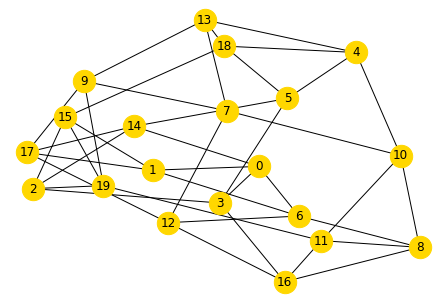

In [6]:
nx.draw_spring(G, node_color='gold', node_size=500, with_labels=True)

In [7]:
qaoa = QAOA(G)

In [8]:
gamma_npts = 50
beta_npts = 50

In [9]:
gammas = np.linspace(0, np.pi/2, gamma_npts)
betas = np.linspace(-np.pi/4, np.pi/4, beta_npts)

In [10]:
costs = np.empty(shape=(gamma_npts, beta_npts))
# costs = np.load('../data/qaoa_20_qubits_landscape.npz')['costs']

In [11]:
%%time
hilbert = np.array(list(hilbert_iter(n_qubits=nq)))

CPU times: user 6.99 s, sys: 96.6 ms, total: 7.09 s
Wall time: 7.11 s


In [12]:
hilbert.shape

(1048576, 20)

In [17]:
%%time
for i, g in enumerate(gammas):
    for j, b in enumerate(betas):
        
        psi = qaoa.simulate(g, b).final_state
        p = np.abs(psi)**2
        costs[i,j] = qaoa.cost_from_probs(p, hilbert=hilbert)
        
    print('Done with {} points'.format((i+1)*beta_npts))

Done with 50 points
Done with 100 points
Done with 150 points
Done with 200 points
Done with 250 points
Done with 300 points
Done with 350 points
Done with 400 points
Done with 450 points
Done with 500 points
Done with 550 points
Done with 600 points
Done with 650 points
Done with 700 points
Done with 750 points
Done with 800 points
Done with 850 points
Done with 900 points
Done with 950 points
Done with 1000 points
Done with 1050 points
Done with 1100 points
Done with 1150 points
Done with 1200 points
Done with 1250 points
Done with 1300 points
Done with 1350 points
Done with 1400 points
Done with 1450 points
Done with 1500 points
Done with 1550 points
Done with 1600 points
Done with 1650 points
Done with 1700 points
Done with 1750 points
Done with 1800 points
Done with 1850 points
Done with 1900 points
Done with 1950 points
Done with 2000 points
Done with 2050 points
Done with 2100 points
Done with 2150 points
Done with 2200 points
Done with 2250 points
Done with 2300 points
Done wit

In [18]:
# g = nx.to_numpy_array(G)
# np.savez('qaoa_20_qubits_landscape.npz', gamma_pts=gammas, beta_pts=betas, costs=costs, graph=g)

In [21]:
i, j = np.unravel_index(costs.argmin(), costs.shape)

In [23]:
gamma_opt, beta_opt = gammas[i], betas[j]

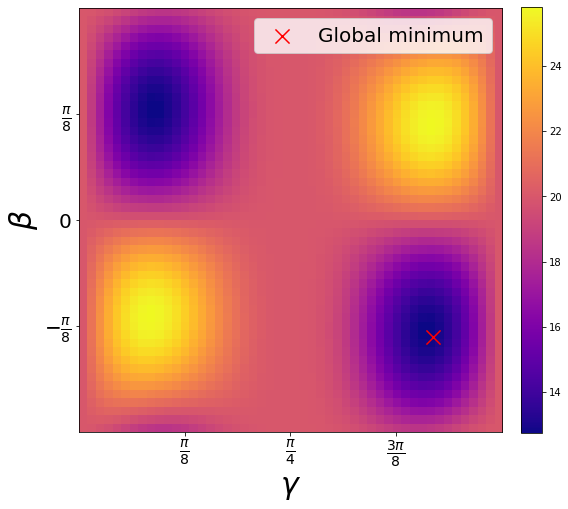

In [28]:
fig, ax = plt.subplots(figsize=[8,8])

m = ax.imshow(costs.T[::-1], cmap='plasma', extent=(0, np.pi/2, -np.pi/4, np.pi/4))

ax.set_xticks([np.pi/8, np.pi/4, 3*np.pi/8])
ax.set_xticklabels([r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$', r'$\frac{3\pi}{8}$'], fontsize=20)
ax.set_yticks([-np.pi/8, 0, np.pi/8])
ax.set_yticklabels([r'$-\frac{\pi}{8}$', r'$0$', r'$\frac{\pi}{8}$'], fontsize=20)

ax.set_xlabel(r'$\gamma $', fontsize=30)
ax.set_ylabel(r'$\beta $', rotation=90, fontsize=30)

fig.colorbar(m, ax=ax, fraction=0.046, pad=0.04)

ax.scatter([gamma_opt], [beta_opt], marker='x', c='red', s=200, label='Global minimum')
ax.legend(frameon=True, fontsize=20)

plt.tight_layout()

# plt.savefig('qaoa_20_qubit_landscape.pdf')